In [58]:
from pandas import read_csv, DataFrame, concat
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot
import numpy
from pandas.plotting import autocorrelation_plot

### Load dataset

In [50]:
series = read_csv('datasets/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns=['t', 't+1']
dataframe.head()

t  t+1
0   NaN   35
1  35.0   32
2  32.0   30
3  30.0   31
4  31.0   44

In [51]:
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

print('train_X ', train_X.shape)
print('train_y ', train_y.shape)
print('test_X ', test_X.shape)
print('test_y ', test_y.shape)

train_X  (239,)
train_y  (239,)
test_X  (125,)
test_y  (125,)


In [52]:
predictions = [x for x in test_X]

### Residuals
We expect residual errors to be random. A sign of a pattern or structure suggests that there is more information that a model could capture and use to make better predictions.

In [53]:
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals_df = DataFrame(residuals)
residuals_df.head()

0
0   9.0
1 -10.0
2   3.0
3  -6.0
4  30.0

#### Residual Line Plot
We expect plot to be random around value 0 and not show any trend or cyclic structure

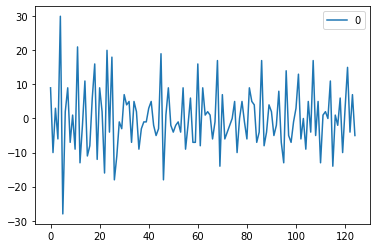

In [54]:
residuals_df.plot()
pyplot.show()

#### Residual Summary Statistics
A value close to zero for mean suggests no bias in the forecasts. 

In [55]:
residuals_df.describe()

0
count  125.000000
mean     0.064000
std      9.187776
min    -28.000000
25%     -6.000000
50%     -1.000000
75%      5.000000
max     30.000000

#### Residual Histogram and Density Plot
We expect forecast errors to be normally distributed around a zero mean. 

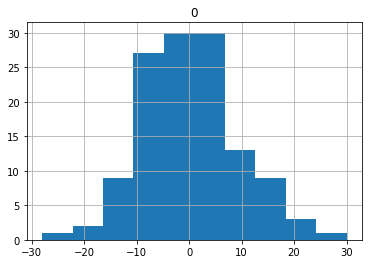

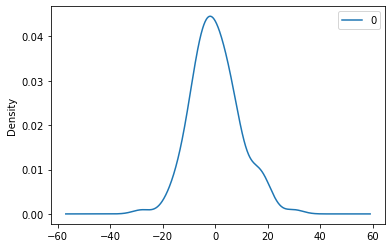

In [56]:
residuals_df.hist()
pyplot.show()
residuals_df.plot(kind='kde')
pyplot.show()

Distributions looks Gaussian but perhaps is more pointy i.e. exponential distribution with some asymmtery. If it was distinctly non-Gaussian, it would suggest that assumptions made by the modelling process were incorrect. 

#### Residual Q-Q Plot
A Q-Q plot compares two distributions. Comparison is shown as a scatter plot. A mtach between two distributions is shown as a diagonal line from the bottom-left to the top-right on the plot. 

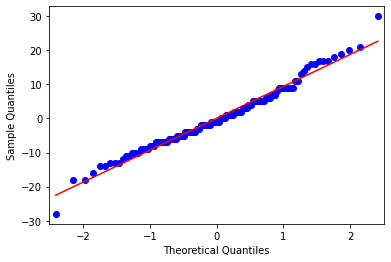

In [57]:
qqplot(numpy.array(residuals), line='r')
pyplot.show()

#### Residual Autocorrelation Plot
We do not expect any correlation between the residuals. A significant autocorrelation in the residual plot suggests that the model could be doing a better job of incorporating the relationship between observations and lagged observations, called autoregression.

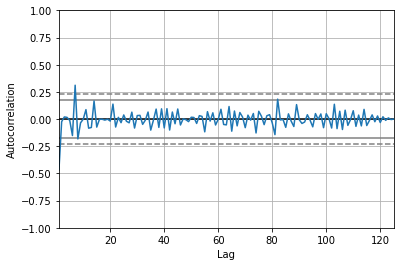

In [60]:
autocorrelation_plot(residuals_df)
pyplot.show()